# Lesson 3 | Neural Nets Foundations
> If You are Feeling Intimidated Like Me, Lets Work Through This Together

>Checkout this notebook in [colab](https://colab.research.google.com/github/nglillywhite/blog/blob/main/posts/2022-12-29-Fastai%20Lesson%203.ipynb)

This chapter focuses on understanding the absolute bare bones fundamentals of how deep learning works. In particular the individual calculations that are being done at each and every 'artificial neuron' of any deep learning network that we build. I'm certainly not from a math background and am generally intimidated but intrigued by learning math like this. I think I have shaky foundational math understanding but I'm hoping working through this course in great detail will bolster these core concepts and I can build on them. Despite my enjoyment of math in school, I did only the general curriculum in my final two years because the math teachers in my school were able to induce a coma purely via the audio of their voice. I have no doubt they were well intentioned people but many were phoning in the days and I wasn't willing to spend half of my school day with them. I'm paying the price for it now having to re-learn these concepts but maybe its for the best, if they'd explained that $y=mx+b$, derivatives, and quadratics could detect cancers and make self driving cars I probably would have been a more passionate student. I feel very much a product of the "[Mathematician's Lament](https://www.maa.org/external_archive/devlin/LockhartsLament.pdf)" that is referenced in chapter 1 of the book. Its a lovely read and I took many lessons away from the write-up, not only in how I want to teach things going forward but also a strong emotional response to how something as incredible as math is ruined and tarnished because of how its taught. Think of where we could be, but nonetheless this blog is about chapter 3 of the fastai course, not math education.

Here I am, and in the spirit of the "Sidebar: Tenacity and Deep Learning" from the book, I'm hoping that writing this blog and working through the content is a explicit evidence of success for me being both tenacious, and re-learning my math roots.

## Main Topics

The main concepts I want to have a 'mechanistic' & intuitive feeling for after this chapter are:

 - ReLu
 - Matrix Multiplication
 - Tensors
 - Gradient Descent
 
Hopefully after reading this blog you also feel comfortable with these important tools and feel as comfortable as I intend to be implementing and discussing these core concepts.

As mentioned in the lecture, this chapter has different content in the book from the lecture and I'd like to work through both, I'm firstly going to follow along the lecture with Jeremy and re-write & create the functions and tools he builds, barring the excel work which I'd like to re-write in python here, I will then work through the book content.

## Lecture Content

### Timm Module

Jeremy first talks through improving his pet classifier from the previous lesson, in particular having a look at different architectures and using the 'timm' library for vision model architectures. Lets have a look at the timm module and whats available

In [1]:
import timm

len(timm.list_models()), timm.list_models()[:20]

(964,
 ['adv_inception_v3',
  'bat_resnext26ts',
  'beit_base_patch16_224',
  'beit_base_patch16_224_in22k',
  'beit_base_patch16_384',
  'beit_large_patch16_224',
  'beit_large_patch16_224_in22k',
  'beit_large_patch16_384',
  'beit_large_patch16_512',
  'beitv2_base_patch16_224',
  'beitv2_base_patch16_224_in22k',
  'beitv2_large_patch16_224',
  'beitv2_large_patch16_224_in22k',
  'botnet26t_256',
  'botnet50ts_256',
  'cait_m36_384',
  'cait_m48_448',
  'cait_s24_224',
  'cait_s24_384',
  'cait_s36_384'])

There are a lot of models, almost ~1000 which is kind of nuts, looks like its certainly beefed up by different sizes of what I think is the same architecture structure, lets get a model down and have a look at the architecture.

In [2]:
resnet18 = timm.models.resnet18()
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act1): ReLU(inplace=True)
      (aa): Identity()
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, m

Ok so I've brought down a 'tiny' model (in the scheme of todays models which have millions of parameters) called resnet16 which I used on my shark classifier in chapter 2 and the resnet architecture is what Jeremy references in the lecture.

It looks like there are many 'Sequential' layers with 'BasicBlocks' inside them which then have a bunch of individual 'submodules' if we copy the language from the model.get_submodule() API which we're about to use. Lets now have a look at a particular submodule. The get_submodule() method allows us to step down the 'tree' and 'branches' of the layers with a dot notation. We shall step all the way down to a leaf, take particular note of the branch names contained within the smooth brackets '()'. First we go via the "Layer1" layer, into the first BasicBlock which has the notation of '(O)', I'm guessing because the layer is an array of BasicBlocks, the first index being 0, then I'm going to pick the BatchNorm2d submodule which has the notation of '(bn1)' within the brackets.

In [3]:
layer = resnet18.get_submodule("layer1.0.bn1")
list(layer.parameters())

[Parameter containing:
 tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        requires_grad=True)]

OK so we've got a couple of tensors, one set to all ones and another set to all zeroes, lets have a look at the doc to see if there's any hints.

In [4]:
from torch.nn import BatchNorm2d

BatchNorm2d?

Init signature:
BatchNorm2d(
    num_features: int,
    eps: float = 1e-05,
    momentum: float = 0.1,
    affine: bool = True,
    track_running_stats: bool = True,
    device=None,
    dtype=None,
) -> None
Docstring:     
Applies Batch Normalization over a 4D input (a mini-batch of 2D inputs
with additional channel dimension) as described in the paper
`Batch Normalization: Accelerating Deep Network Training by Reducing
Internal Covariate Shift <https://arxiv.org/abs/1502.03167>`__ .

.. math::

    y = \frac{x - \mathrm{E}[x]}{ \sqrt{\mathrm{Var}[x] + \epsilon}} * \gamma + \beta

The mean and standard-deviation are calculated per-dimension over
the mini-batches and :math:`\gamma` and :math:`\beta` are learnable parameter vectors
of size `C` (where `C` is the input size). By default, the elements of :math:`\gamma` are set
to 1 and the elements of :math:`\beta` are set to 0. The standard-deviation is calculated
via the biased estimator, equivalent to `torch.var(input, unbiased=False)`

Ok deadset I'm not sure what a lot, if not all of this means, but there's a nice link to the paper that proposed this submodule. Maybe I'll revisit this later or what I'm guessing is that we will discuss batch normalisation as part of the course. Nonetheless, credit due to the pytorch team for awesome docs and references. I'm certainly feeling comfortable picking apart a model and submodules to then research or understand the peices. And to Jeremy's point, it looks like each module is just tensors which I'm assuming get matrix multiplied.

Lets have a look at another one

In [5]:
layer = resnet18.get_submodule("layer1.0.conv2")
list(layer.parameters())

[Parameter containing:
 tensor([[[[ 4.0545e-02,  4.8013e-02, -7.9456e-02],
           [-5.8342e-02,  1.8714e-02,  2.5578e-02],
           [-1.5636e-01, -8.9058e-02,  4.3196e-03]],
 
          [[-5.7252e-02,  4.2811e-02, -3.8337e-02],
           [-1.5927e-02, -2.0729e-02, -3.4939e-02],
           [ 2.8172e-02, -2.9295e-02,  1.0223e-01]],
 
          [[ 1.1034e-01,  1.0192e-01,  2.2622e-02],
           [-5.7816e-02,  7.5169e-03, -1.2539e-02],
           [ 5.4043e-02,  5.3313e-02, -5.1092e-02]],
 
          ...,
 
          [[ 1.4856e-01, -3.9668e-02,  1.1007e-01],
           [ 6.2836e-02, -7.5064e-02,  1.3311e-02],
           [ 3.8345e-02,  4.9784e-02, -5.2364e-03]],
 
          [[ 1.0018e-01, -3.8737e-02, -6.8930e-02],
           [ 2.6070e-02,  9.0727e-02, -2.9921e-03],
           [ 5.0226e-02, -9.6558e-02,  1.5128e-02]],
 
          [[-8.9405e-03, -2.8120e-02, -8.0413e-02],
           [-5.9768e-02, -3.7978e-02,  6.5733e-02],
           [ 1.0449e-02,  7.8835e-02,  4.7149e-02]]],
 
 
   

Ok lets stop that, this thing is big. But nonetheless its interesting to see the different shapes and values, the batch norm module had zeroes and ones, this one seems to have all sorts of values and the shape is very different.

As Jeremy mentions, apparently these numbers can figure out if a dog is a basset hound or not, or in our previous example, a great white shark or a hammerhead. However this isn't clear at this time. Again as Jeremy mentions, machine learning is the act of fitting a function to data, lets investigate this further.

### How Do We Fit a Function to Data

Lets first build a general quadratic equation and plot it. I don't actually have an intuitive feeling for what makes this a 'quadratic' but again in the spirit of 80% do and 20% study, I'm going to soldier on to see the 'ball game' played out and circle back later to solidfy my theory as part of the 20% reading principle outlined in Radek's Metalearning book which I love. Note to Radek, I'm trusting you that this is a good plan, its working so far but as a product of school doing the opposite, I feel very conflicted moving on without actually 'knowing'.


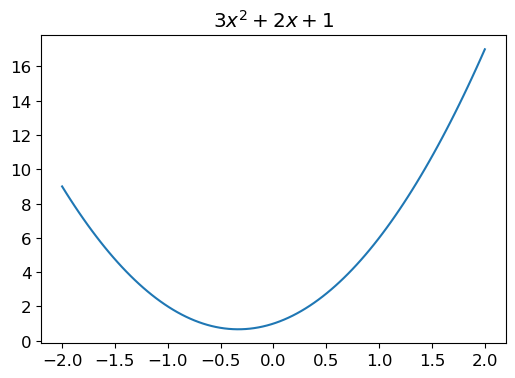

In [6]:
from fastbook import plot_function

def f(x): return 3*x**2 + 2*x + 1

plot_function(f, title="$3x^2 + 2x + 1$")

This f(x) function is nice to plot that particular function but it'd be nice to be able to play with the parameters, so lets define a quad() function where we can pass in what we like.

Also functionally these two definitions of a function are the same that I've written below, its just a nice python syntax to be able to write it on one line but its not very common in the general python universe.

In [7]:
def quad(a,b,c,x): return a*x**2 + b*x + c

def quad(a,b,c,x):
    return a*x**2 + b*x + c

In [8]:
quad(3,2,1,1.5)

10.75

Lets introduce as Jeremy does partial functions, he describes it as something along the lines of 'fixing' part of a function. I've thought of it as making a modified function from another function but his description is simpler.

### Partial Functions

In [9]:
from functools import partial

def mk_quad(a,b,c): return partial(quad,a,b,c)
f = mk_quad(3,2,1)
f(1.5)

10.75

In [10]:
from fastai.torch_core import doc

doc(partial)

The [python docs themselves are quite useful](https://docs.python.org/3/library/functools.html#functools.partial) at describing partials. For example, "Return a new partial object which when called will behave like *func* called with the positional and keyword arguments."

"The partial() is used for *partial function application* which "freezes" some portion of a function's arguements and keywords, resulting in a new object with a simplified signature."

Looks like Jeremy is more accurate, closer to the original python docs & its probably a better analogy of partial objects. My understanding is improved and I'll stop saying function from another function and start espousing something similar to the docs & Jeremy.

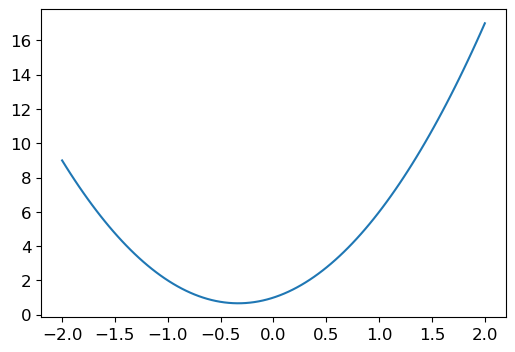

In [11]:
plot_function(f)

### Adding Noise to Our Perfect Functions

Lets now make some 'real' looking data,  we can add some noise to this function to more closely represent what data we're more likely to spot out in the hypothetical real world where the generator function of our data is perfect like this but we also live in the same world with innacurate measuring devices.

### Nassim Taleb is an Awesome Writer

Side note, the book "Fooled by Randomness" and "Black Swan" by Nassim Taleb are genuinely inspiring works that made me think and behave about and in the world differently. In particular Nassim introduces the concept of these 'invisible' generators that create the randomness in our world, the main problem is that we only ever observe a sample from these generators. Despite 'long' time frames relative to our lives, ie having data over 20 years, that simply might be an insufficient sample from the 'generator' to make any worthwhile inference of what the actual likelihood of your observations actually are. Irrelevant to the python we're writing right now but when imaginging this hypothetical world where we observe this perfect function but only see a noisy version, I thought I'd share some of my favourite books.

In [12]:
from numpy.random import normal, seed, uniform
import numpy as np

np.random.seed(42)

def noise(x, scale): return normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x, mult)) + noise(x,add)

Lets investigate each of the variables that Jeremy instantiates in the next few lines. I want to understand what each method is doing

In [13]:
doc(normal)

C:\Users\Nick\Anaconda3\envs\fastai\lib\site-packages\fastcore\docscrape.py:225: UserWarning: Unknown section See Also
  else: warn(msg)
C:\Users\Nick\Anaconda3\envs\fastai\lib\site-packages\fastcore\docscrape.py:225: UserWarning: Unknown section Notes
  else: warn(msg)
C:\Users\Nick\Anaconda3\envs\fastai\lib\site-packages\fastcore\docscrape.py:225: UserWarning: Unknown section References
  else: warn(msg)
C:\Users\Nick\Anaconda3\envs\fastai\lib\site-packages\fastcore\docscrape.py:225: UserWarning: Unknown section Examples
  else: warn(msg)


Ok so the normal function will draw random samples from a normal distribution, we have a scale and size variable which set the standard deviation and number of outputs we'd like

In [14]:
# We can see 10 samples which are taken from a normal distribution with a standard deviation of 0.3

normal(scale=.3,size=10)

array([ 0.14901425, -0.04147929,  0.19430656,  0.45690896, -0.07024601, -0.07024109,  0.47376384,  0.23023042, -0.14084232,  0.16276801])

In [15]:
import torch

torch.linspace?

Docstring:
linspace(start, end, steps, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

Creates a one-dimensional tensor of size :attr:`steps` whose values are evenly
spaced from :attr:`start` to :attr:`end`, inclusive. That is, the value are:

.. math::
    (\text{start},
    \text{start} + \frac{\text{end} - \text{start}}{\text{steps} - 1},
    \ldots,
    \text{start} + (\text{steps} - 2) * \frac{\text{end} - \text{start}}{\text{steps} - 1},
    \text{end})


From PyTorch 1.11 linspace requires the steps argument. Use steps=100 to restore the previous behavior.

Args:
    start (float): the starting value for the set of points
    end (float): the ending value for the set of points
    steps (int): size of the constructed tensor

Keyword arguments:
    out (Tensor, optional): the output tensor.
    dtype (torch.dtype, optional): the data type to perform the computation in.
        Default: if None, uses the global default dtype (see torch.g

torch.linspace looks like a really nice way to build a tensor that I think is 'linearly' spaced out based on the start,stop, and steps variables you provide. So below we start from -2, go all the way to 2, and add 20 steps

In [16]:
test = torch.linspace(-2,2,steps=20)
test, test.shape

(tensor([-2.0000, -1.7895, -1.5789, -1.3684, -1.1579, -0.9474, -0.7368, -0.5263, -0.3158, -0.1053,  0.1053,  0.3158,  0.5263,  0.7368,  0.9474,  1.1579,  1.3684,  1.5789,  1.7895,  2.0000]),
 torch.Size([20]))

Jeremy also runs a '[:,None]' indexation on this linspace which seems like a cool trick to do something but I'm not quite sure what. It look like he wants all of the columns, hence the ';' semi-colon which gives you all but I'm not sure what the None command does.

In [17]:
test[:,None], test.shape

(tensor([[-2.0000],
         [-1.7895],
         [-1.5789],
         [-1.3684],
         [-1.1579],
         [-0.9474],
         [-0.7368],
         [-0.5263],
         [-0.3158],
         [-0.1053],
         [ 0.1053],
         [ 0.3158],
         [ 0.5263],
         [ 0.7368],
         [ 0.9474],
         [ 1.1579],
         [ 1.3684],
         [ 1.5789],
         [ 1.7895],
         [ 2.0000]]),
 torch.Size([20]))

Ok so it looks like it transposes the tensor from being a single row with many columns to being one column with many rows. I think my language of 'rows' and 'columns' is incorrect, this is simply a data table / dataframe way of thinking and tensors are fundamentally different so I need to figure out better language but I'm hoping we're at a simple enough state where this makes sense.

In [18]:
add_noise(f(test),.3,1.5),add_noise(f(test)[:,None],.3,1.5)

(tensor([ 6.8462,  8.8242,  5.6874,  0.0668,  2.5397, -0.3367,  1.1174, -2.0877, -1.5065,  0.7694,  2.8983,  2.0570,  2.7686,  1.8973,  2.4570,  6.5024,  5.4335, 14.5344, 12.1449, 12.8678],
        dtype=torch.float64),
 tensor([[10.4171],
         [ 8.5229],
         [ 4.1870],
         [ 6.9400],
         [-0.3862],
         [ 3.5329],
         [ 0.9949],
         [ 0.2577],
         [ 0.8716],
         [-1.9179],
         [ 0.7355],
         [ 2.3589],
         [ 4.1434],
         [ 1.8529],
         [ 5.7365],
         [ 9.5709],
         [10.5256],
         [15.6337],
         [14.9300],
         [14.4798]], dtype=torch.float64))

Ok so it looks like the same kind of data but transposed as we saw before

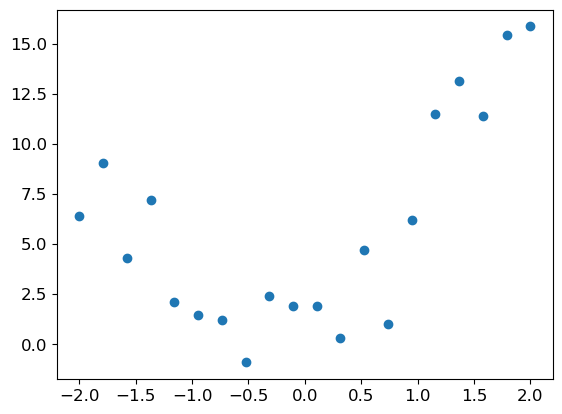

In [19]:
from matplotlib import pyplot as plt

x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(f(x), 0.3, 1.5)
plt.scatter(x,y)

Lets try it without the transposing

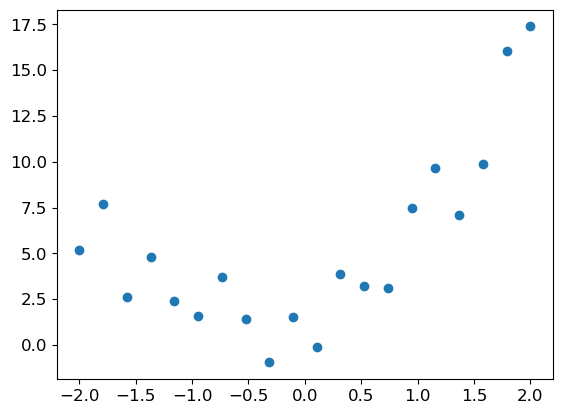

In [20]:
x = torch.linspace(-2,2,steps=20)
y = add_noise(f(x),0.3,1.5)
plt.scatter(x,y)

Ok looks the same, Jeremy not sure why we did this transposing of a 1d tensor but its certainly a neat trick. Lets move on and start playing with some parameters and Ipython interactivity

In [21]:
from ipywidgets import interact

@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a,b,c):
    plot_function(mk_quad(a,b,c))
    plt.scatter(x,y)
    

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

Now if you're reading on quarto, I recognise that you won't be able to play with the plot I've written above so I've re-written a plot function command with Altair so that you can play around with it on the blog.

In [22]:
import pandas as pd
import altair as alt

def plot_altair(a=1.5,b=1.5,c=1.5, title="$3x^2 + 2x + 1$"):
    a, b, c = 1.5, 1.5, 1
    f = mk_quad(a,b,c)
    x = torch.linspace(-2,2,steps=20)
    y = add_noise(f(x),0.3,1.5)
    data = pd.DataFrame({"x":x.numpy(), "y":y.numpy()})
    scatter = alt.Chart(data).mark_point().encode(
        x='x:Q',
        y='y:Q'
    )

    f = mk_quad(a,b,c)

    selector_a =  alt.selection_single(name="selector_a", 
                                    fields=['a'],  
                                    bind=alt.binding_range(min=0, max=3, step=0.1, name='A'),
                                    init={'a': a,}) 
    selector_b = alt.selection_single(name="selector_b",
                                    fields=['b'], 
                                    bind=alt.binding_range(min=0, max=3, step=0.1, name='B'),
                                    init={'b': b})
    # selector_c = alt.selection_single(name="selector_c",
    #                                 fields=['c'], 
    #                                 bind=alt.binding_range(min=0, max=3, step=0.1, name='C'),
    #                                 init={'c': c})


    line = alt.Chart(pd.DataFrame({"x":x.numpy(),"y":1,"c":c})).mark_line(color="red").encode(
        x='x',
        y='y',
    ).transform_calculate(
        y="((selector_a.a*pow(datum.x,2) + selector_b.b*datum.x)) + datum.c").properties(title=title).add_selection(selector_b).add_selection(selector_a)

    return (line + scatter)

plot_altair()

alt.LayerChart(...)

Also I know I've not given you the bias term to play with here or "c" for you to adjust. For whatever reason altair absolutely throws a fit if I change the "datum.c" to "selector_c.c" despite them supposedly being the same values. The function line plot goes absolutely haywire and I have not been able to troubleshoot it and playing with "a" and "b" still hammers home the point of seeing the 'fit' of the line dependent on these values.

### Adding a Loss Function
As Jeremy mentions, if we think back to Arthur Samuel from the first chapter, we want some automatic way to measure how well we've fit our function to the data, this would be our loss function. A simple and popular metric is Mean Squared Error (MSE) which is calculated by averaging the squared error of all the predictions of your model. Here is a python implementation below.

In [23]:
# from the lecture

def mse(predictions, actuals): return ((predictions-actuals)**2).mean()

In [24]:
@interact(a=1.5, b=1.5, c=1.5)
def plot_quad(a,b,c):
    f = mk_quad(a,b,c)
    loss = mse(f(x),y)
    plot_function(f, title=f"Mean Squared Error Loss: {loss}")
    plt.scatter(x,y)
    

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

Again if you're on quarto, you won't be able to play with the interactive pyplot graph here where you can see the loss change as the parameters are modified. There's also no way to dynamically change labels in Altair to my knowledge from a few stack overflow and github question. I'm going to replot our interactive graph with an example title that matches the pyplot so you can follow along without bringing down my notebook. If you wanted to see the magic values change and really have this sink in, please bring down the notebook or open it in colab & play with the plots ☺.

In [25]:
plot_altair(title="Mean Squared Error Loss: 3.1498 ")

alt.LayerChart(...)

### Derivatives, Rate of Change, Gradients

At this point it should be clear that you can muck around with these variables to fit this function line to our data depending on the a,b,c terms. We can manually play around with them and see the MSE or loss function improve or get worse. When doing this by hand, its a manual activity and we're checking the number go up or down but if we wanted to 'Arthur Samuel' style automate this process, we can use derivatives.

The way that I have understood derivates previously is that they help you explain the 'rate of change' for a function at any point. This relates to the gradient of a point on the curve since the gradient will tell me for any point on a function how much y will change if I change x, but because we don't have a linear function, this gradient changes a lot as we move along the curve. Derivatives let me figure out this gradient at any point.

Now this is a naive and likely wrong way of explaining derivatives, its just me writing out my thoughts and shaky foundations as they are currently. However the high level concept of derivatives being 'a way of knowing the correct direction to change a value in order to minimise our loss' is the important bit and I'm fairly confident that I'm not too wrong there. Take my explanations with a grain of salt as I am but this is the current nuance of how I think about derivatives, and gradients in relation to functions and minimising losses

Pytorch will calculate these gradients for us so we reliably can always know how to change our parameters in order to improve our loss function. I feel like we're starting to see the symphony of concepts come together here.

In [26]:
# from lecture

def quad_mse(params):
    f = mk_quad(*params)
    return mse(f(x), y)

quad_mse([1.5,1.5,1.5])

tensor(8.7027, dtype=torch.float64)

### 1D Tensors & functions_

Ok we're now playing with tensors again, and there's two important things to note, firstly how many dimensions our tensor has, in this case only 1 as we can only move along one dimension of the tensor. Unlike a 2D tensor like a dataframe where we could move along rows and columns, and a 3D tensor where we could move along columns, up or down rows, and depth-wise into different 'slices' of this dataframe. Hopefully that feels comfortable of the dimensions of a tensor. The other important note here is we are calling a *requires_grad_()* function which has an important *_* after the function name, this means to do the operation 'inplace' or on the object we're calling it with. If we call the function without the *_* it will return the output of the function but to a new object instead of the object we used to call the function, I'll show you below.

In [27]:
abc = torch.tensor([1.5,1.5,1.5])
abc

tensor([1.5000, 1.5000, 1.5000])

Lets modify 'abc' via the add function but also inspect abc after.

In [28]:
abc.add(5), abc

(tensor([6.5000, 6.5000, 6.5000]), tensor([1.5000, 1.5000, 1.5000]))

We can see the 'abc' tensor is still unchanged, despite calling the 'add()' function to it which returned a modified tensor with what we'd expect abc to look like after adding '5' to each value. Lets now try and inplace function.

In [29]:
abc.add_(5), abc

(tensor([6.5000, 6.5000, 6.5000]), tensor([6.5000, 6.5000, 6.5000]))

Now we can see that 'abc' has been modified as well as returning our modified tensor. Now [pytorch actually recommends *NOT* doing in-place modifications](https://pytorch.org/docs/stable/notes/autograd.html#in-place-operations-with-autograd) as its less memory efficient but for demonstration purposes or simplicity if you're not worried about taking the performance hit its totally ok. [Checkout this awesome stackoverflow Q&A](https://stackoverflow.com/questions/52920098/what-does-the-underscore-suffix-in-pytorch-functions-mean) to read more on the *_* underscore functions of pytorch and the pytorch recommendations.

Lets get back to using torch's mad grad functions.

In [30]:
abc = torch.tensor([1.5,1.5,1.5])
abc.requires_grad_()
abc

tensor([1.5000, 1.5000, 1.5000], requires_grad=True)

In [31]:
loss = quad_mse(abc)
loss

tensor(8.7027, dtype=torch.float64, grad_fn=<MeanBackward0>)

Ok so we've replicated our call before to quad_mse and can see the same loss, lets now calculate the gradients on our tensor by calling backward(), which is a reference to backpropagation or backprop.

In [32]:
loss.backward?

Signature:
loss.backward(
    gradient=None,
    retain_graph=None,
    create_graph=False,
    inputs=None,
)
Docstring:
Computes the gradient of current tensor w.r.t. graph leaves.

The graph is differentiated using the chain rule. If the tensor is
non-scalar (i.e. its data has more than one element) and requires
gradient, the function additionally requires specifying ``gradient``.
It should be a tensor of matching type and location, that contains
the gradient of the differentiated function w.r.t. ``self``.

This function accumulates gradients in the leaves - you might need to zero
``.grad`` attributes or set them to ``None`` before calling it.
See :ref:`Default gradient layouts<default-grad-layouts>`
for details on the memory layout of accumulated gradients.

.. note::

    If you run any forward ops, create ``gradient``, and/or call ``backward``
    in a user-specified CUDA stream context, see
    :ref:`Stream semantics of backward passes<bwd-cuda-stream-semantics>`.

.. note::

  

In [33]:
loss.backward()

Now its silently succeeded, but what its done is add a 'grad' attribute to our abc tensor, with each corresponding value of grad explaining how the values of the tensor 'abc' will change if we add to them.

In [34]:
abc.grad

tensor([-8.8147, -2.5687, -3.3284])

Ok so with each of these gradients, we need to decrease our parameters in order to reduce our loss function as the gradients are positive, meaning if we add to them, the loss will get worse.

As Jeremy states, we want to add the 'negative' of our gradients by some small value as we don't want to leap too far along our function curve and overshoot the optimal value. We need to multiply our gradients by a 'learning rate', which is this small value that helps us move along the curve, the size of the learning rate changes how far along the curve we leap.

In [35]:
# our loss previously
loss

tensor(8.7027, dtype=torch.float64, grad_fn=<MeanBackward0>)

Note we disable the gradient calculation with torch.no_grad() since "abc.requires_grad" is true which means that anytime the tensor is used in a function, it calculates the gradients. We want to actually do this manually ourselves by updating abc by the learning and then re-calculating the loss.

Lets do this and see if our loss improves

In [36]:
learning_rate = 0.01

with torch.no_grad():
    abc -= abc.grad*learning_rate
    loss = quad_mse(abc)
    
loss

tensor(7.7900, dtype=torch.float64)

It got better! By an absolutely abysmal amount, maybe we need a bigger learning rate.... Or more compute, lets try a few iterations

In [37]:
learning_rate = 0.001

for iteration in range(15):
    with torch.no_grad():
        abc -= abc.grad*learning_rate
        loss = quad_mse(abc)
        print(f"The current loss is {loss}")

loss

The current loss is 7.703210825482984
The current loss is 7.617265245186357
The current loss is 7.532139525570576
The current loss is 7.447834176037972
The current loss is 7.364347814316565
The current loss is 7.281681682942621
The current loss is 7.1998362652288055
The current loss is 7.11881036492495
The current loss is 7.03860418552117
The current loss is 6.959218837030955
The current loss is 6.880653384174158
The current loss is 6.8029071783484
The current loss is 6.725981924145863
The current loss is 6.649874654988925
The current loss is 6.574588277622159


tensor(6.5746, dtype=torch.float64)

How awesome is this, we have a improving loss value because of these gradients being updated, our loss being calculated and being looped over again and again. This process is called **Optimisation using gradient descent**, we've done a very basic implementation but nonetheless this is a key term to solidify and refer back to in the future. Its a sensible name since we're *Optimising* our parameters in our tensor for our loss function using *gradients* to *descend* down to the lowest loss value.

### Rectified Linear Units | ReLu

As Jeremy noted, this is all well and good so far but it doesn't feel very likely that we can optimise for many real world datasets or observations since they'd have to fit a quadratic form to match the parameters we have to play with. If we introduce the ReLu, we can start to address this problem.

A relu has the form of $f(x) = max(0,x)$ with all values under 0 being clipped to 0, we do this with torch.clip(). This probably isn't the correct 'math' way to write it out but this is the useful illustration to me of anything at 0 or below being clipped and then returning x otherwise.

Lets first plot a ReLu with the function $y=mx+b$ and see what it looks like

In [38]:
torch.clip?

Docstring:
clip(input, min=None, max=None, *, out=None) -> Tensor

Alias for :func:`torch.clamp`.
Type:      builtin_function_or_method


Ok so clip is a nice alias for torch.clamp, lets checkout those docs

In [39]:
torch.clamp?

Docstring:
clamp(input, min=None, max=None, *, out=None) -> Tensor

Clamps all elements in :attr:`input` into the range `[` :attr:`min`, :attr:`max` `]`.
Letting min_value and max_value be :attr:`min` and :attr:`max`, respectively, this returns:

.. math::
    y_i = \min(\max(x_i, \text{min\_value}_i), \text{max\_value}_i)

If :attr:`min` is ``None``, there is no lower bound.
Or, if :attr:`max` is ``None`` there is no upper bound.


.. note::
    If :attr:`min` is greater than :attr:`max` :func:`torch.clamp(..., min, max) <torch.clamp>`
    sets all elements in :attr:`input` to the value of :attr:`max`.

Args:
    input (Tensor): the input tensor.
    min (Number or Tensor, optional): lower-bound of the range to be clamped to
    max (Number or Tensor, optional): upper-bound of the range to be clamped to

Keyword args:
    out (Tensor, optional): the output tensor.

Example::

    >>> a = torch.randn(4)
    >>> a
    tensor([-1.7120,  0.1734, -0.0478, -0.0922])
    >>> torch.clamp(a, m

We're using the 'min' variable to enforce every value being at least 0.

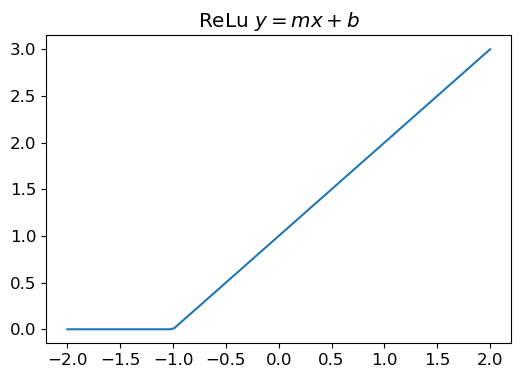

In [40]:
def relu(x,m,b):
    y = m*x+b
    return torch.clip(y,0.)

relu_partial = partial(relu,1,1)

plot_function(relu_partial, title="ReLu $y=mx+b$")

Lets make it interactive again with altair & matplotlib so you can muck around on the blog as well as in the notebook

In [41]:
@interact(m=1.0, b=1.5)
def plot_relu(m,b):
    plot_function(partial(relu,m,b), title="ReLu $y=mx+b$")

interactive(children=(FloatSlider(value=1.0, description='m', max=3.0, min=-1.0), FloatSlider(value=1.5, descr…

For my Quarto friends....

In [42]:
m,b = 1.5,1.5

x = torch.linspace(-2,2,50)
y=relu_partial(x)

selector_m =  alt.selection_single(name="selector_m", 
                                fields=['m'],
                                bind=alt.binding_range(min=0, max=3, step=0.1, name='M'),
                                init={'m': m}) 
selector_b = alt.selection_single(name="selector_b",
                                fields=['b'], 
                                bind=alt.binding_range(min=0, max=3, step=0.1, name='B'),
                                init={'b': b})
# selector_c = alt.selection_single(name="selector_c",
#                                 fields=['c'], 
#                                 bind=alt.binding_range(min=0, max=3, step=0.1, name='C'),
#                                 init={'c': c})

data = pd.DataFrame({"x":x.numpy(),"y":y})

line = alt.Chart(data=data,title="ReLu y = mx + b").mark_line(color="red").encode(
    x='x:Q',
    y='y:Q',
).transform_calculate(y=f"max(0,(selector_m.m * datum.x) + {b})").properties(title="y = mx+b").add_selection(selector_m)

line

alt.Chart(...)

Similar to the quadratic, I can't seem to get the bias term which changes the intercept to interact nicely with the transform_calculate function of altair but you can see how playing with the 'm' term changes partly the steepness of the slope up as well as where the curve starts its ascent from 0 where its been clipped. Again, highly recommend bringing the notebook from my github over to colab but hopefully there's enough interactivity that it sinks in what we're playing with.

Lets now make a double ReLu which lets us connect two of these units together.

In [43]:
def double_relu(m1,b1,m2,b2,x): return relu(x,m1,b1) + relu(x,m2,b2)

In [44]:
@interact(m1=-1.5,b1=-1.5,m2=1.5,b2=1.5)
def plot_double_relu(m1,b1,m2,b2):plot_function(partial(double_relu,m1,b1,m2,b2))

interactive(children=(FloatSlider(value=-1.5, description='m1', max=1.5, min=-4.5), FloatSlider(value=-1.5, de…

Once again for my Quarto friends, forgive me for the lack of b1/b2 bias terms, you can still get the point with the m1 and m2 values how you can make any kind of point and direction that you need.

In [45]:
m1,b1, m2, b2 = -1.5,-1.5,3,3

x = torch.linspace(-2,2,50)
f = partial(double_relu,m1,b1,m2,b2)
y= f(x)

selector_m =  alt.selection_single(name="selector_m", 
                                fields=['m1'],
                                bind=alt.binding_range(min=-3, max=3, step=0.1, name='M1'),
                                init={'m1': m1}) 
selector_b = alt.selection_single(name="selector_b",
                                fields=['b1'], 
                                bind=alt.binding_range(min=-3, max=3, step=0.1, name='B'),
                                init={'b1': b1})
selector_mm =  alt.selection_single(name="selector_mm", 
                                fields=['m2'],
                                bind=alt.binding_range(min=-3, max=3, step=0.1, name='M2'),
                                init={'m2': m2}) 
selector_bb = alt.selection_single(name="selector_bb",
                                fields=['b2'], 
                                bind=alt.binding_range(min=-3, max=3, step=0.1, name='B'),
                                init={'b12': b2})

data = pd.DataFrame({"x":x.numpy(),"y":y})

line = alt.Chart(data=data,title="Double ReLu y = (mx + b) + (mx+b)").mark_line(color="red").encode(
    x='x:Q',
    y='y:Q',
).transform_calculate(y=f"(max(0,(selector_m.m1 * datum.x) + {b1})) + (max(0,(selector_mm.m2 * datum.x) + {b2}))").properties(title="y = mx+b").add_selection(selector_m).add_selection(selector_mm)

line

alt.Chart(...)

### Draw the Owl Problem

**"At this point, we have the ability to draw an elbow/squiggle, if we connect enough of these elbows and squiggles together, we can approximate/fit any function in existence given enough elbows."**

As mentioned by Jeremy, we run into the the 'draw the rest of the owl problem'. This fact seems rediculous, this is an important essence of deep learning and we've established every foundational peice of this 'magic'. Its absolutely mind blowing (to me at least) that this is the underlying mechanics of the kind of software that detects cancers and shazam's the song you're listening to.

![Draw the Rest of the Owl Meme](https://pbs.twimg.com/media/Bs13i6LCcAAvwCf.jpg)

Everything further in deep learning are tricks, methods, strategies, ideas, and efficient ways to play around and build upon this simple concept, honestly astonishing. It doesn't quite feel real to me but I can see Jeremy's point, given enough squiggles you could make any shape imaginable, with our ability to create a loss function and update our parameters accordingly, we can also automatically find the right values given we have enough squiggles which is a product of our model architecture.

How do we do all this efficiently, in comes matrix calculations which allows us to combine a whole bunch of parameters multiplied by a whole bunch of other input values that we're feeding them.

### Matrix Calculations

[Jeremy walks through an awesome site](http://matrixmultiplication.xyz/) that visually shows how matrix multiplication works. This really helps sink in how the process works, I think its naturally confusing because you have to have two matrices (tensors in our case) of different shapes and you topple one over on the side and slide it over like a window in order to multiply it by the other matrix as the website shows.

Lets replicate the matrices (tensors) in python and step through each of the multiplications one by one to see how we arrive at our final tensor (matrix).

In [46]:
a = torch.tensor([[1,2,1],
                  [0,1,1],
                  [2,3,1]])

x = torch.tensor([[2,5],
                  [6,7],
                  [1,8]])

a,x

(tensor([[1, 2, 1],
         [0, 1, 1],
         [2, 3, 1]]),
 tensor([[2, 5],
         [6, 7],
         [1, 8]]))

Ok so we've got two tensors, one which is 3x3 (rows x columns) and the other which is 3x2, if we multiply them together we will yield a 3x2 tensor.

Lets also checkout the docs for pytorch's matrix multiplication method which is torch.mm(), we can also run the calculation by the syntax '@' as the operator, e.g 'a@x'

In [47]:
torch.mm?

Docstring:
mm(input, mat2, *, out=None) -> Tensor

Performs a matrix multiplication of the matrices :attr:`input` and :attr:`mat2`.

If :attr:`input` is a :math:`(n \times m)` tensor, :attr:`mat2` is a
:math:`(m \times p)` tensor, :attr:`out` will be a :math:`(n \times p)` tensor.

.. note:: This function does not :ref:`broadcast <broadcasting-semantics>`.
          For broadcasting matrix products, see :func:`torch.matmul`.

Supports strided and sparse 2-D tensors as inputs, autograd with
respect to strided inputs.

This operation has support for arguments with :ref:`sparse layouts<sparse-docs>`.
If :attr:`out` is provided it's layout will be used. Otherwise, the result
layout will be deduced from that of :attr:`input`.


.. warning::
    Sparse support is a beta feature and some layout(s)/dtype/device combinations may not be supported,
    or may not have autograd support. If you notice missing functionality please
    open a feature request.

This operator supports :ref:`TensorFloat

And lets run our matrix multiplication to see the result.

In [48]:
torch.mm(a,x), a@x

(tensor([[15, 27],
         [ 7, 15],
         [23, 39]]),
 tensor([[15, 27],
         [ 7, 15],
         [23, 39]]))

Awesome, looks just like the website demonstrated.

As we tip the x tensor on its side to match the width of tensor a, our first set of calculations are ((2x1) + (6x2) + (1x1)) = 15. We can see the python indexation equivalent below which helps match up mentally how these calculations are done.

In [49]:
f"({x[0,0]} x {a[0,0]}) + ({x[1,0]} x {a[0,1]}) + ({x[2,0]} x {a[0,2]})"

'(2 x 1) + (6 x 2) + (1 x 1)'

This gives us our first result of our output tensor which is '15', which we can see at the 0,0 index of our result.

We then slide the 'x' tensor down one so we've now got two 'window' rows to calculate.

We run the first row of calculations which is (5x1) + (7x2) + (8x1) = 27, again we can check the indexation in python and our result ends up in the 0,1 position of our output tensor

In [50]:
f"({x[0,1]} x {a[0,0]}) + ({x[1,1]} x {a[0,1]}) + ({x[2,1]} x {a[0,2]})"

'(5 x 1) + (7 x 2) + (8 x 1)'

At the same time we're also calculating the second row of (2x0) + (6x1) + (1x1) = 7 as our first 'column' of our x tensor is now being calculated against the second 'row' of our 'a' tensor. This output is stored at the 1,0 indexation of our output tensor.

In [51]:
f"({x[0,0]} x {a[1,0]}) + ({x[1,0]} x {a[1,1]}) + ({x[2,0]} x {a[1,2]})"

'(2 x 0) + (6 x 1) + (1 x 1)'

Ok, I'm hoping that very explicit example in python in combination with the matrix multiplication website has knuckled down the laborious task of doing matrix multiplications. Thankfully as we saw, torch does all the magic and we don't have to do this hand-written work but scribing this down really matches up the theory with the python indexation vernacular so that they are welded together in my mind and I feel comfortable explaining the concept as well as demonstrating the mechanics of the interactions between the tensors.

I did wonder what happens if the tensors are mis-shapen, so lets just add an extra row to our x tensor so that the 3 columns of tensor 'a' don't match up to the now 4 'rows' of our x tensor.

In [52]:
a = torch.tensor([[1,2,1],
                  [0,1,1],
                  [2,3,1]])

x = torch.tensor([[2,5],
                  [6,7],
                  [1,8],
                  [100,100]])

torch.mm(a,x)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x3 and 4x2)

Turns out you can't, how bout that!

I'm guessing you can add infinite rows to tensor 'a' however since the 'windowing' process doesn't change as the 3 'a' columns x 3 'x' rows match still works and there's simply more windowing to be done.

In [53]:
a = torch.tensor([[1,2,1],
                  [0,1,1],
                  [2,3,1],
                  [100,100,100],
                  [200,200,200],
                  [300,300,300]])

x = torch.tensor([[2,5],
                  [6,7],
                  [1,8]])

torch.mm(a,x)

tensor([[  15,   27],
        [   7,   15],
        [  23,   39],
        [ 900, 2000],
        [1800, 4000],
        [2700, 6000]])

Cool, looks like that still functions fine, good to try these things out. I wondered if the 'x' tensor with its 4th row would just result in a (100x0) operation since there is nothing in tensor 'a' at that indexation (since it doesn't exist) but it looks like you'd simply have to reshape tensor 'a' and fill a value of 0 if you wanted that operation to happen.

### Deep Learning with Excel

[At this point in the lecture (1:04:22)](https://youtu.be/hBBOjCiFcuo?t=3862), Jeremy builds a deep learning model in excel, which is absolutely insane and proves to me he just operates on another vibrational level, plane, existence, whatever you want to call it. Who gets up in the morning and thinks of doing deep learning in excel?! Then again, he's got some deep (pun not indended but very much enjoyed) programming roots in APL and S which are kind of the roots of excel and Jeremy was doing deep learning in the 90s so it doesn't surprise me he natively thinks in this array programming style. Who knew consultants, accountants, etc are all just huge functional programming fans, the OOP vs functional factional wars continue and people don't even know they're fighting the war.

That being said, its super cool, its a great demonstration of how it really is these fundamental calculations that we've done by hand which produce the deep learning outcomes we're seeing. Highly recommend the watch if you're in disbelief of what I'm writing here.

I was originally thinking of writing this exercise in python but I'll admit its already been quite a substantial journey to walk through only the lecture content and I'd like to make sure I get through the book content as well before investing what will be a decent chunk of time to get it right. If you're reading this I haven't yet come back to revisit this part and re-implement the excel work, feel free to either remind me or be patient as I likely will come back and pythonify the amazing example that Jeremy works through, maybe we'll even use a new dataset.

## Book Content

### Training a Digit Classifier

We're going to wind back the clock to 1998 when the "National Institute of Standards and Technology" or 'NIST' collected ~60,000 training and ~10,000 testing images of hand written digits and MNIST was born. One of the most famous datasets in all of machines learning, the 'M' in MNIST comes from the "Modified" word since the original creators mixed the training and test samples together since NIST originally took their training samples from a different cohort (American Census Bureau Employees) to their training sample (American High School Students). [Thanks Wiki for the history lesson](https://en.wikipedia.org/wiki/MNIST_database), in the same year, Yann Lecun and his colleagues used a Neural Net named "Lenet-5" to demonstrate accurate recognition of the handwritten pictures. [Checkout this video of "Lenet-1"](https://youtu.be/FwFduRA_L6Q) which Yann states is "the first convolutional network that could recognise handwritten digits with good speed and accuracy." Its honestly bonkers seeing how amazing this tech was back in 93 yet it still took another couple of decades to hit mainstream & for the brilliance to be recognised. Its amazing watching these absolute gangsters in this random basement build history making software like its nothing.

Lets Begin!

### 3 or 7?

Lets download MNIST and then only get the threes and sevens, fastai has some awesome helpers to do this.

In [54]:
from fastai.vision.all import *
from fastbook import *

In [55]:
URLs.MNIST_SAMPLE

'https://s3.amazonaws.com/fast-ai-sample/mnist_sample.tgz'

In [56]:
from pathlib import Path

data_base = Path("../data/")
mnist_path = data_base / "MNIST"

In [57]:
mnist_path.mkdir(exist_ok=True)

In [58]:
untar_data(URLs.MNIST_SAMPLE)

Path('C:/Users/Nick/.fastai/data/mnist_sample')

I then move all my data from my .fastai home over to my created directory

In [59]:
(mnist_path / "mnist_sample").ls()

(#3) [Path('../data/MNIST/mnist_sample/labels.csv'),Path('../data/MNIST/mnist_sample/train'),Path('../data/MNIST/mnist_sample/valid')]

In [60]:
sample_path = mnist_path / "mnist_sample"
sample_path

Path('../data/MNIST/mnist_sample')

In [61]:
(sample_path / "train").ls()

(#2) [Path('../data/MNIST/mnist_sample/train/3'),Path('../data/MNIST/mnist_sample/train/7')]

Here are our threes and sevens, lets get them into separate variables

In [62]:
threes = (sample_path / "train/3").ls().sorted()
sevens = (sample_path / "train/7").ls().sorted()
threes, sevens

((#6131) [Path('../data/MNIST/mnist_sample/train/3/10.png'),Path('../data/MNIST/mnist_sample/train/3/10000.png'),Path('../data/MNIST/mnist_sample/train/3/10011.png'),Path('../data/MNIST/mnist_sample/train/3/10031.png'),Path('../data/MNIST/mnist_sample/train/3/10034.png'),Path('../data/MNIST/mnist_sample/train/3/10042.png'),Path('../data/MNIST/mnist_sample/train/3/10052.png'),Path('../data/MNIST/mnist_sample/train/3/1007.png'),Path('../data/MNIST/mnist_sample/train/3/10074.png'),Path('../data/MNIST/mnist_sample/train/3/10091.png')...],
 (#6265) [Path('../data/MNIST/mnist_sample/train/7/10002.png'),Path('../data/MNIST/mnist_sample/train/7/1001.png'),Path('../data/MNIST/mnist_sample/train/7/10014.png'),Path('../data/MNIST/mnist_sample/train/7/10019.png'),Path('../data/MNIST/mnist_sample/train/7/10039.png'),Path('../data/MNIST/mnist_sample/train/7/10046.png'),Path('../data/MNIST/mnist_sample/train/7/10050.png'),Path('../data/MNIST/mnist_sample/train/7/10063.png'),Path('../data/MNIST/mnist_

Lets checkout a 3

In [63]:
im3 = Image.open(threes[1])
im3

Its a little baby, so tiny! We can now convert this image into a tensor/array which is what we were playing with earlier in the matrix multiplication section.

In [64]:
array(im3)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0

I'm going to take a stab and say that the value of the number is how light or dark that specific pixel is, black being 255 and pure white being 0. Its connecting for me how the tensor calculations we were doing earlier are so applicable to working with images, underneath they're just sneaky matrix friends. We can make it a tensor as well:

In [65]:
tensor(im3), tensor(im3).shape

(tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253,

Only 28,28 pixels but we can totally workout what we're seeing with some detail, how cool. We can index into these tensors like we did earlier when walking through matrix multiplication, fastai has a cool trick to show you the instensity of the pixels via dataframes:

In [66]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


### Baselines

At this moment, before we dive into deep learning our way to victory, the book introduces baseline solutions. I think this is an important concept that I commonly fail to try when starting a data science problem, instead of implementing a solution immedietly that has the following attributes:
 - Simple
 - Perform Reasonably Well
 - Easy to Test
 
I usually get stuck way in the weeds of trying to do something hard an don't end up with a useful output. Lets instead build a baseline for the key reasons the book mentions, you can test your new ideas to see if they are better than your baseline which can be implented almost instantly. You can either try a simple / naive idea or copy down someone elses already implemented solution so you have a starting point for your problem.

Lets follow the book example of simply averaging all the pixels of threes and sevens which might yeild an 'ideal' seven or three value. Also this little list making magic is called "List Comprehension" and similar to one line methods, it gives you a great way of creating lists in one line.[The python docs are excellent](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) and I recommend a read through if you haven't seen this before.

In [67]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

Lets check if our tensors got built properly:

In [68]:
three_tensors[1]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 2

<AxesSubplot: >

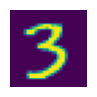

In [69]:
show_image(three_tensors[1])

Looks good to me, certainly looks modified from our original image but the actual tensor itself on the cell before looks correct so I'm going to roll with it.

### Rank-3 Tensors

Now is where we start to get a little freaky, we're going to make a rank 3 tensor which you can think of as having 3 'dimensions'. Currently we have a long list of tensors, ie we have a list and each element is a tensor, we can index into the list elements and then into any subset of the pixels of that tensor. We're going to now 'stack' all the list elements into its own dimension so that we have 3 dimensions to index through, instead of one dimension (the list) which then contains the tensors. It should mentally feel like a 'cube' of stacked tensors, where we can slide depth-wise through to each image, and horizontally or vertically to scan within an image.

Pytorch has the lovely method stack() which lets us achieve this, we will then convert everything to a float and divide by 255 as usually images have expected values between 0 and 1 if they're floats.

In [70]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

See how we have our 6131 images, each with 28x28 pixels, whereas our threes is a list with an individual element containing a tensor

In [71]:
len(three_tensors), three_tensors[0].shape

(6131, torch.Size([28, 28]))

Also note that the length of a tensors shape is its 'rank' or how many axes/dimensions it has. The 'ndim' attribute also gives you the same answer.

In [72]:
len(stacked_threes.shape), stacked_threes.ndim

(3, 3)

Lets now implement that baseline and average all the tensors and show the image to see what 'ideal' looks like

<AxesSubplot: >

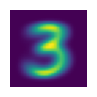

In [73]:
me3 = stacked_threes.mean(0)
show_image(me3)

Objectively a 'pretty' three if I don't say so myself. Credit to fastai's top tier joke in their book : "You may not like it, but this is what peak 3 performance looks like". We've gotta find joy in these sorts of things given the world.

Lets checkout 7 as well

<AxesSubplot: >

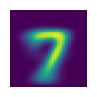

In [74]:
me7 = stacked_sevens.mean(0)
show_image(me7)

### Measuring Loss

Ok so we have our ideal three and ideal seven, we now want to compare any three or seven to the ideal seven or three and whichever category has the smallest loss is most likely the category for the sample we've picked. Some common data science methods for loss functions are the mean absolute difference, also known as the *L1 norm*, or we could square the differences and take that distance, which would be the *L2 norm*.

Lets calculate both of these:

In [75]:
sample_3 = stacked_threes[1]

# Distance of our sample from our mean three or 'ideal 3'
error = sample_3 - me3

three_abs_dist = error.abs().mean()
three_square_dist = (error**2).mean().sqrt()

three_abs_dist, three_square_dist

(tensor(0.1114), tensor(0.2021))

How cool that we can just take away a tensor from another and pytorch does the magic, really nice syntax! Lets have a quick look at the actual error tensor too:

In [76]:
error

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00, -7.2918e-05, -1.9637e-04, -2.3410e-04, -1.9253e-04,
         -2.7568e-04, -2.6161e-04, -2.9423e

Ok super messy, not exactly legible but you can see how the absolute bottom rows and top rows have no loss since they're simply empty so our sample three is actual 'ideal' in those pixels but there's loss everywhere else.

Lets do sevens now

In [77]:
# Distance of our sample from our mean three or 'ideal 3'
error = sample_3 - me7

seven_abs_dist = error.abs().mean()
seven_square_dist = (error**2).mean().sqrt()

seven_abs_dist, seven_square_dist

(tensor(0.1586), tensor(0.3021))

In both the L1 and L2 losses, our sample 3 has a smaller loss compared to our ideal three so we'd correctly categorise it in this situation.

Pytorch has both of these loss functions out of the box from the 'torch.nn.functional' modules so we don't need to handwrite out these functions in the future, its also stylistic to import this module as "F". I've seen this done with pyspark and some other libraries, seems like a nice habit when importing a library/package which is meant to represent math like 'functions'

In [78]:
import torch.nn.functional as F

F.l1_loss(sample_3.float(),me7), F.mse_loss(sample_3, me7).sqrt()

(tensor(0.1586), tensor(0.3021))

Voila! The loss is the same, looks like our handwritten work aint too bad, just messy and I can safely depend on pytorch to calculate it correctly instead of me mis-writing this calculation.

### Building Training and Validation Datasets

Ok so we've built our baseline loss and predictive method, however we're not training any components and we're not holding out a portion of our data to make sure we're not over-fitting. The MNIST dataset has already been split for us so lets simple setup those tensors using the pre-split data sets. Building a good validation set is however a really important part of the process and [Rachel Thomas's post explains it best](https://www.fast.ai/posts/2017-11-13-validation-sets.html), go read this post for better words than I'll be able to put together.

In [79]:
sample_path.ls()

(#3) [Path('../data/MNIST/mnist_sample/labels.csv'),Path('../data/MNIST/mnist_sample/train'),Path('../data/MNIST/mnist_sample/valid')]

In [80]:
valid_3 = torch.stack([tensor(Image.open(o)) for o in (sample_path/"valid/3").ls()])
valid_3 = valid_3.float()/255

valid_7 = torch.stack([tensor(Image.open(o)) for o in (sample_path/"valid/7").ls()])
valid_7 = valid_7.float()/255

valid_3.shape, valid_7.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

Lets now calculate the loss for all our threes in the validation set against our 'ideal' three

### Broadcasting Tensors and Loss Functions

When pytorch encounters a function between two tensors of different ranks, it will broadcast the smaller ranked tensor to match and have the same size as the larger tensor. [Pytorch's broadcast semantics](https://pytorch.org/docs/stable/notes/broadcasting.html#broadcasting-semantics) has a decent description of what they're doing, it [appears to be a numpy concept which is well documented here](https://numpy.org/devdocs/user/basics.broadcasting.html#general-broadcasting-rules).

We're going to use this with our loss functions since even though we're giving the function a single example, its going to broadcast it 1,010 times to match the 'depth' of our validation tensor. This allows us to compute these sorts of things on the GPU instead of CPU which makes it lightning fast in comparison, torch also does smart things like not allocating extra memory and simply pretending like its of the proper rank without the wasted duplication. Often this will happen in the background and you don't have to explicitly write the broadcasting which makes it simple to write mentally and understand, love your work pytorch gang!

In [81]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

mnist_distance(sample_3, me3)

tensor(0.1114)

There is one important difference here in that we're calling mean() with a tuple of (-1,-2) which we didn't do before. In python you can index with a '-' simple to represent 'from the last index', meaning that we want to calculate the mean from the last, and second last indexes of the tensor, being the two axes of 28x28 pixels.

In [82]:
valid_3_dist = mnist_distance(valid_3, me3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260]),
 torch.Size([1010]))

In [83]:
(valid_3-me3).shape

torch.Size([1010, 28, 28])

Awesome, we've got all our ducks in a row, now lets write a function to tell if a sample given is a three or not, ie is the distance smaller from the ideal three or ideal seven.

In [84]:
def is_3(x): return mnist_distance(x,me3) < mnist_distance(x,me7)

is_3(sample_3), is_3(sample_3).float()

(tensor(True), tensor(1.))

Looks good, lets now calculate over all our validation threes

In [85]:
is_3(valid_3)

tensor([ True,  True,  True,  ..., False,  True,  True])

Uh oh, I see some errors already, lets check the accuracy

In [86]:
accuracy_3 = is_3(valid_3).float().mean()

Now to calculate whether something is a seven, it should just be the inverse of whether its a three. We can do this two ways, either by calculating '1-' our is_3() function or we can use the python 'unary' or 'invert' operator '~' tilde which allows us to invert an operation. I would argue 1- is easier to read since the unary operator isn't very common and to be honest it can be easy to miss or confuses people as to what it does. Its also known as the bitwise inversion or bitwise operator if you're curious, [checkout the docs](https://docs.python.org/3/reference/expressions.html?highlight=bitwise#unary-arithmetic-and-bitwise-operations)

In [87]:
# 1- since we want to get the inverse of is_3 to get an 'is_7' function
accuracy_7 = (1-is_3(valid_7).float().mean())

unary_accuracy_7 = (~is_3(valid_7)).float().mean()

accuracy_3, accuracy_7, unary_accuracy_7

(tensor(0.9168), tensor(0.9854), tensor(0.9854))

Well we're already at ~91% and ~99% for threes and sevens, I think thats pretty awesome considering we're just doing some averages and using the raw tensors against each other.

### Moving from 'Ideal' to Weights with Activations

As mentioned in the book, if we're thinking of Arthur Samuel's interpretation of a self learning machine, we want to have a set of weights which we can update which will be highly activated for a particular category, ie large values. If we're thinking of a '1', the weights representing the middle of the image should be highly activated and the weights down the side should be lowly activated, unlike an '8' which would have highly activated sides since the hips of the digit would activate the weights. We would want a set of weights for each category and we'd want to times all the weights by the pixels, calculate a loss, figure the gradients for the weights and update them by some learning rate. This function might look something like:

In [88]:
def probability_of_eight(image, weights): return (image*weights).sum()

Assume 'image' is the image represented as a vector, so all the pixels lined up in a rank-1 tensor, all the rows lined up one after the other instead of stacked into a rank-2 tensor like we view them. Assume the 'weights' variable is also a vector where we can update them after calculating the loss and gradients which we times by some learning rate, we can iterate over and over to get to useful activations that tell us which category the digit drawings are.

Ok directly from the book, here are the steps we require to make our classifier:
 1. Initialise the weights to some set of values
 2. For each image, use the weights to predict a 3 or 7 spotted
 3. Based on those predictions, calculate how effective the model was or its loss
 4. Calculate the gradient for our weights, which will tell us how changing those weights would impact the loss function
 5. Change all the weights based on the gradients and some learning rate
 6. Repeat steps 2 through 6 until the training process (this loop) is stopped from successfully completing the task or sheer boredom sets in

Lets start by classifying a simpler function using these steps and then expanding our process to fit our digits. Lets generate a 'noisy' function again. This is a step by step walkthrough from the book working through SGD with a quadratic function.

In [89]:
time = torch.arange(0,20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

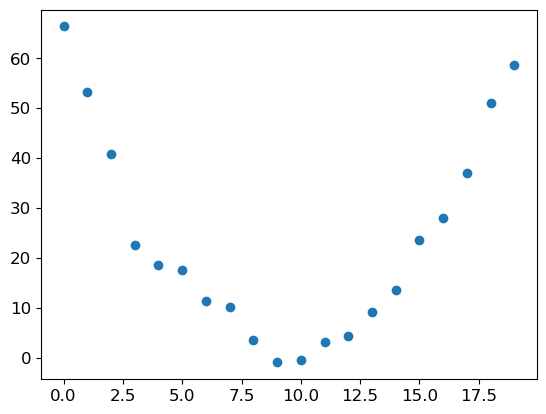

In [90]:
noise = torch.randn(20)*3 + 0.66*(time-9.5)**2 + 1
plt.scatter(time, noise)

Lets make a function that takes in our input values (noise) and some parameters we define which we can tune whilst returning the combination of those two sets.

In [91]:
def f(noise, params):
    a,b,c = params
    return a*(noise**2) + (b*noise) + c

Lets define our mean squared error (mse) loss function again, we could use the pytorch one from before but practice is practice.

In [92]:
def mse(preds,targets): return ((preds-targets)**2).mean()

### Step 1: Initialise parameters

There are lots of techniques for parameter initialisation but lets start with totally random. We also want to make sure requires_grad is true since we want to know the gradients so we can adjust the parameters after we calculate our loss function. We do this with 'requires_grad_()' which we've discussed earlier.

In [93]:
params = torch.randn(3).requires_grad_()
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

Not many parameters but its a start. Lets also store our original parameter setup

In [94]:
original_params = params.clone()

### Step 2: Calculate Predictions

We have some silly starting parameters as they're literally random but this is kind of the point right? We're writing a process for the model to learn, not us, so starting with random really hammers that home.

In [95]:
preds = f(time, params)
preds

tensor([ 1.3525e+00, -1.6391e-01, -3.2121e+00, -7.7919e+00, -1.3903e+01, -2.1547e+01, -3.0721e+01, -4.1428e+01, -5.3666e+01, -6.7436e+01, -8.2738e+01, -9.9571e+01, -1.1794e+02, -1.3783e+02,
        -1.5926e+02, -1.8222e+02, -2.0671e+02, -2.3274e+02, -2.6029e+02, -2.8938e+02], grad_fn=<AddBackward0>)

Lets compare our predictions to the real data to see how we did

In [96]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, noise)
    ax.scatter(time, to_np(preds), color="red")
    # ax.set_ylim(-500,200)

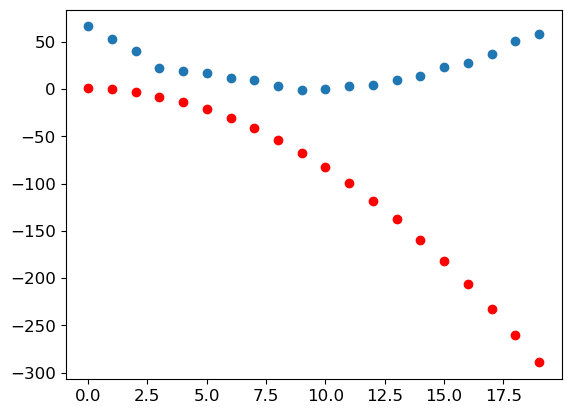

In [97]:
show_preds(preds)

Someone call the model ambulance, we're needing some life support here, this is terrible! But we're starting at random so no surprises we're a long way off where we want to be, lets move on our loop.

### Step 3: Calculate the Loss

Lets use the mse function we defined earlier

In [98]:
loss = mse(preds, noise)
loss

tensor(24837.7344, grad_fn=<MeanBackward0>)

### Step 4: Calculate the Gradients
Ok so as long as we improve this loss, our prediction should get better, lets calculate the gradients so we know what to change and by how much

In [99]:
loss.backward()
params.grad

tensor([-52298.7070,  -3362.8569,   -247.9058])

Ok these are some large reductions that we've got to make, lets set a learning rate so we can 'step' by a certain amount with these gradients as they will change as they move along the curve.

In [100]:
learning_rate = 1e-5
params.grad * learning_rate

tensor([-0.5230, -0.0336, -0.0025])

In [101]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

### Step 5: Step the weights
Ok we've got our gradients, we have our learning rate, lets update our weights and predict again

In [102]:
params.data, params.grad.data

(tensor([-0.7658, -0.7506,  1.3525]),
 tensor([-52298.7070,  -3362.8569,   -247.9058]))

In [103]:
params.data = learning_rate * params.grad.data
params.grad = None

We set the gradients back to None so that they get freshly calculated the next time we call them in a function as we're manually stepping weights here despite the tensors "requiring_grad" being true meaning any function call modifies these gradients.

In [104]:
preds = f(time,params)
mse(preds, noise)

tensor(12315.0635, grad_fn=<MeanBackward0>)

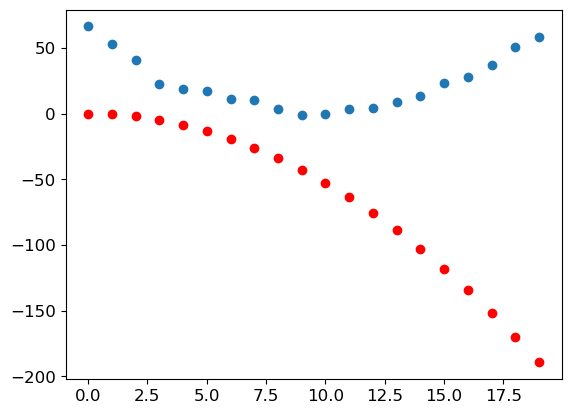

In [105]:
show_preds(preds)

We're looking a little flatter here, hopeful signs I think, lets create a method to run those steps we just did and then run in a loop to do them lots of times

In [106]:
def step(params, show_results=True):
    preds = f(time,params)
    loss = mse(preds,noise)
    loss.backward()
    params.data -= learning_rate * params.grad.data
    params.grad = None
    if show_results: print(loss.item())
    return preds

### Step 6: Repeat the Process

Now we run our step function within our 'training loop'

In [107]:
for i in range(10): step(params)

12315.0634765625
2779.215087890625
974.7388916015625
633.2742919921875
568.6563720703125
556.42626953125
554.1096801757812
553.6688232421875
553.5830688476562
553.5643920898438


Looks like we very quickly converged on some optimal value and our gradients became super small, meaning our loss started moving very slowly down, how interesting!

Lets set our parameters back to the original values and see the learning process

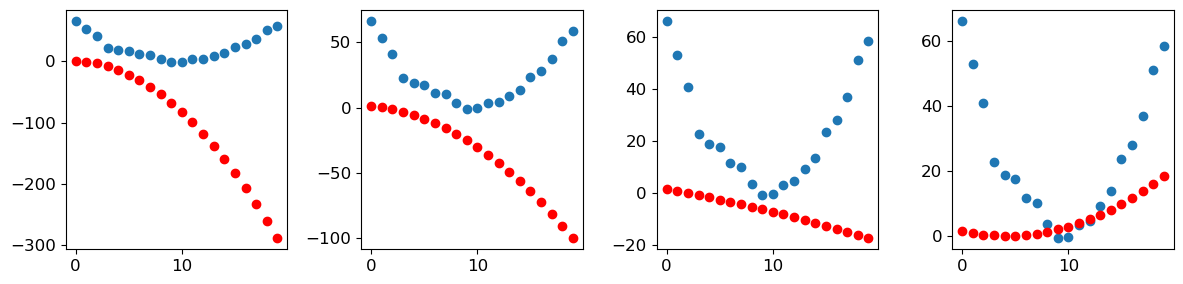

In [108]:
# Reset back to original parameters
params = original_params.detach().requires_grad_()

_, axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(step(params,False), ax)
plt.tight_layout()

You can see that our function starts doing the exact opposite of what we'd hope but is flipping itself over to find a less lossy version of itself, I wonder if it converges on this flat configuration when considering our loss stopped at ~518 instead of continuing to learn the upper curve. I suspect this is some sort of local minimum that its running into but we'd have to continue training to see if it gets out of this flat spot

### Step 7: Stop

We've decided to just run 10 loops of our training process but really we'd like to be more intelligent in our stopping as either we've solved the problem sufficiently or we're no longer "learning" are probably far better choices for how and when to stop. I'm sure we'll dive deeper into this process later in the course.

### Back to MNIST

Ok lets return to our MNIST dataset, lets also recall that we want to transform our rank 2 tensor training images into rank 1 tensors so that all the pixels are lined up in one big long vector. We will do that with torch.view() and we'll also put the threes and sevens all together in one training tensor.

In [109]:
train_x = torch.cat([stacked_threes,stacked_sevens]).view(-1,28*28)
train_x.shape

torch.Size([12396, 784])

In [110]:
stacked_threes.shape, stacked_sevens.shape, 28*28

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]), 784)

Lets quickly look at cat() and view() so we understand how train_x was put together

In [111]:
torch.cat?

Docstring:
cat(tensors, dim=0, *, out=None) -> Tensor

Concatenates the given sequence of :attr:`seq` tensors in the given dimension.
All tensors must either have the same shape (except in the concatenating
dimension) or be empty.

:func:`torch.cat` can be seen as an inverse operation for :func:`torch.split`
and :func:`torch.chunk`.

:func:`torch.cat` can be best understood via examples.

Args:
    tensors (sequence of Tensors): any python sequence of tensors of the same type.
        Non-empty tensors provided must have the same shape, except in the
        cat dimension.
    dim (int, optional): the dimension over which the tensors are concatenated

Keyword args:
    out (Tensor, optional): the output tensor.

Example::

    >>> x = torch.randn(2, 3)
    >>> x
    tensor([[ 0.6580, -1.0969, -0.4614],
            [-0.1034, -0.5790,  0.1497]])
    >>> torch.cat((x, x, x), 0)
    tensor([[ 0.6580, -1.0969, -0.4614],
            [-0.1034, -0.5790,  0.1497],
            [ 0.6580, -1.0969,

In [112]:
train_x.view?

Docstring:
view(*shape) -> Tensor

Returns a new tensor with the same data as the :attr:`self` tensor but of a
different :attr:`shape`.

The returned tensor shares the same data and must have the same number
of elements, but may have a different size. For a tensor to be viewed, the new
view size must be compatible with its original size and stride, i.e., each new
view dimension must either be a subspace of an original dimension, or only span
across original dimensions :math:`d, d+1, \dots, d+k` that satisfy the following
contiguity-like condition that :math:`\forall i = d, \dots, d+k-1`,

.. math::

  \text{stride}[i] = \text{stride}[i+1] \times \text{size}[i+1]

Otherwise, it will not be possible to view :attr:`self` tensor as :attr:`shape`
without copying it (e.g., via :meth:`contiguous`). When it is unclear whether a
:meth:`view` can be performed, it is advisable to use :meth:`reshape`, which
returns a view if the shapes are compatible, and copies (equivalent to calling
:meth:`conti

In [113]:
train_x.shape,stacked_threes.shape, stacked_sevens.shape, 28*28

(torch.Size([12396, 784]),
 torch.Size([6131, 28, 28]),
 torch.Size([6265, 28, 28]),
 784)

Since our stacked_threes and stacked_sevens are the same shape, we concatenate them along the first dimension (dimension 0) since thats the default of the method, this explains the '12396' length of train_x since thats where we've concatenated.

As the book explains, the view(-1,28\*28) call is strange as its odd to see (-1,28\*28) as a shape, the trick is that -1 says to view that says, "make this axis as big as necessary to fit all the data", this leaves us with the vector of 784 capturing the entire image (and matching the 28*28 shape we asked for) as well as '-1' being as long as needed which is our original length of 12396. We could explicitly specify the 12396 as I'll show below and you'll get the same shape object but -1 is a nice easy way of saying "whatever it needs to be, I don't care, stretch or shrink as need be to represent the data I have".

Ok so we've added the 6131 three images and 6265 seven images into the train_x tensor as well as flattened out their $28*28$ matrix into a 784 long vector representing the same thing. Hopefully you can see the connection here between those two objects.

In [114]:
# same thing as the sneaky tricks we did before

torch.cat([stacked_threes,stacked_sevens]).view(12396,784).shape, train_x.shape

(torch.Size([12396, 784]), torch.Size([12396, 784]))

Ok lets now set our labels which will be '1' for our threes and '0' for our sevens

In [115]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_y.shape, train_x.shape

(torch.Size([12396, 1]), torch.Size([12396, 784]))

Shapes look good, we've got matching labels, 12,396 of them, with a label of size 1 for each, lets have a look

In [116]:
train_y

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [117]:
train_x[1]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,


Ok so for each element in train_x which is this big tensor, we've got a nice little label in train_y to match. I want to see what unsqueeze does as well more visually

In [118]:
squeeze_test = tensor([1]*len(threes))

squeeze_test, squeeze_test.unsqueeze(1)

(tensor([1, 1, 1,  ..., 1, 1, 1]),
 tensor([[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]]))

Ok so it does a nice transpose type change where we can take that long single vector and then make it match the pattern of our train tensor

In [119]:
torch.unsqueeze?

Docstring:
unsqueeze(input, dim) -> Tensor

Returns a new tensor with a dimension of size one inserted at the
specified position.

The returned tensor shares the same underlying data with this tensor.

A :attr:`dim` value within the range ``[-input.dim() - 1, input.dim() + 1)``
can be used. Negative :attr:`dim` will correspond to :meth:`unsqueeze`
applied at :attr:`dim` = ``dim + input.dim() + 1``.

Args:
    input (Tensor): the input tensor.
    dim (int): the index at which to insert the singleton dimension

Example::

    >>> x = torch.tensor([1, 2, 3, 4])
    >>> torch.unsqueeze(x, 0)
    tensor([[ 1,  2,  3,  4]])
    >>> torch.unsqueeze(x, 1)
    tensor([[ 1],
            [ 2],
            [ 3],
            [ 4]])
Type:      builtin_function_or_method


### Pytorch Datasets

A pytorch Dataset is required to return an (x,y) (input, label) tuple when indexed, of course we could use anything for this, we're going to zip a list which is a nice python trick to put together elements.

We will revisit this later to pass into the pytorch classes, but its important to note

In [120]:
dataset = list(zip(train_x,train_y))
x,y = dataset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

Lets make our validation set like we did our training set

In [121]:
valid_x = torch.cat([valid_3, valid_7]).view(-1,28*28)
valid_y = tensor([1]*len(valid_3) + [0]*len(valid_7)).unsqueeze(1)
valid_dataset = list(zip(valid_x,valid_y))

### Step 1: Initialise Weights

Like before, lets randomise some values to get going, lets have a weight for each pixel

In [122]:
def init_params(size,std=1.0): return (torch.randn(size)*std).requires_grad_()

Lets also have a quick look at what our params look like

In [123]:
weights = init_params((28*28,1))
weights.shape, weights[1:10]

(torch.Size([784, 1]),
 tensor([[ 0.6872],
         [-1.0892],
         [-0.3553],
         [-0.9138],
         [-0.6581],
         [ 0.0780],
         [ 0.5258],
         [ 1.1790],
         [-0.4345]], grad_fn=<SliceBackward0>))

This doesn't feel like a very 'deep' architecture considering its one 'layer' deep but lets see if this can even do what we want.

The other important note the book highlights is that $weights*pixels$ won't be enough since if the pixel is 0, or its intercept is 0, we'll end up with a 0 gradient, lets also add the bias term we've seen in our functions so far.

In [124]:
bias = init_params(1)
bias.shape, bias

(torch.Size([1]), tensor([0.6863], requires_grad=True))

In [125]:
(train_x[0]*weights.T).sum() + bias

tensor([20.2336], grad_fn=<AddBackward0>)

Ok so we've multiplied all the weights by all the pixels in the first training example and added our bias term, this fits our $prediction = weights*input + b$ pattern.

Now instead of doing all this heavy lifting in a python loop on the cpu and without matrix multiplication which we worked through before, lets matrix multiply instead.

In [126]:
def predict_matrix(xb): return xb@weights + bias
preds = predict_matrix(train_x)
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

Lets look at our accuracy, remember that over 0 is a prediction for y and below is a prediction for a 3

In [127]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [128]:
corrects.float().mean().item()

0.4912068545818329

Ok pretty spot on random guessing at 50%, that makes sense since we're starting random weights and we'd be randomly guessing. Lets see what happens if we muck with the weights a little bit and predict again. We're going to use a [context manager](https://book.pythontips.com/en/latest/context_managers.html) which are awesome python things, please read those docs if you haven't come across these before to make sure our gradients don't get messed with

In [129]:
with torch.no_grad(): weights[0] *= 1.0001

In [130]:
preds = predict_matrix(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.4912068545818329

No change? What gives?

In [131]:
print(weights.grad, weights.requires_grad)

None True


Well we've got no gradients since we haven't picked a loss function yet, lets define our mnist_loss

In [132]:
def mnist_loss(predictions, targets):
    return torch.where(condition=targets==1, x=1-predictions, y=predictions).mean()

torch.where() is a cool function to return elements from your x or y inputs depending on the condition given, the docs are below as well for some examples which is a helpful reference

In [133]:
torch.where?

Docstring:
where(condition, x, y) -> Tensor

Return a tensor of elements selected from either :attr:`x` or :attr:`y`, depending on :attr:`condition`.

The operation is defined as:

.. math::
    \text{out}_i = \begin{cases}
        \text{x}_i & \text{if } \text{condition}_i \\
        \text{y}_i & \text{otherwise} \\
    \end{cases}

.. note::
    The tensors :attr:`condition`, :attr:`x`, :attr:`y` must be :ref:`broadcastable <broadcasting-semantics>`.

Arguments:
    condition (BoolTensor): When True (nonzero), yield x, otherwise yield y
    x (Tensor or Scalar): value (if :attr:`x` is a scalar) or values selected at indices
                          where :attr:`condition` is ``True``
    y (Tensor or Scalar): value (if :attr:`y` is a scalar) or values selected at indices
                          where :attr:`condition` is ``False``

Returns:
    Tensor: A tensor of shape equal to the broadcasted shape of :attr:`condition`, :attr:`x`, :attr:`y`

Example::

    >>> x = torch.randn(3,

One problem is that our mnist_loss function assumes our predictions are between 0 and 1, this isn't true for our predictions tensor yet:

In [134]:
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

We can however normalise everything by using a sigmoid function, we can use pytorch's sigmoid 'accelerated' (runs on the GPU) version or define it manually like so

In [135]:
def sigmoid(x): return 1/(1+torch.exp(-x))
x = torch.linspace(-5,5,50)
torch.sigmoid(x), sigmoid(x), x

(tensor([0.0067, 0.0082, 0.0100, 0.0123, 0.0150, 0.0184, 0.0224, 0.0273, 0.0333, 0.0406, 0.0493, 0.0598, 0.0724, 0.0873, 0.1050, 0.1258, 0.1500, 0.1779, 0.2097, 0.2456, 0.2853, 0.3287, 0.3751, 0.4241,
         0.4745, 0.5255, 0.5759, 0.6249, 0.6713, 0.7147, 0.7544, 0.7903, 0.8221, 0.8500, 0.8742, 0.8950, 0.9127, 0.9276, 0.9402, 0.9507, 0.9594, 0.9667, 0.9727, 0.9776, 0.9816, 0.9850, 0.9877, 0.9900,
         0.9918, 0.9933]),
 tensor([0.0067, 0.0082, 0.0100, 0.0123, 0.0150, 0.0184, 0.0224, 0.0273, 0.0333, 0.0406, 0.0493, 0.0598, 0.0724, 0.0873, 0.1050, 0.1258, 0.1500, 0.1779, 0.2097, 0.2456, 0.2853, 0.3287, 0.3751, 0.4241,
         0.4745, 0.5255, 0.5759, 0.6249, 0.6713, 0.7147, 0.7544, 0.7903, 0.8221, 0.8500, 0.8742, 0.8950, 0.9127, 0.9276, 0.9402, 0.9507, 0.9594, 0.9667, 0.9727, 0.9776, 0.9816, 0.9850, 0.9877, 0.9900,
         0.9918, 0.9933]),
 tensor([-5.0000, -4.7959, -4.5918, -4.3878, -4.1837, -3.9796, -3.7755, -3.5714, -3.3673, -3.1633, -2.9592, -2.7551, -2.5510, -2.3469, -2.1429

You can see how our values from -5 to 5 get nicely spread between 0 and 1 based on their relative size. Also note torch.sigmoid (fast boi) and our slow implementation produce the same results, below is a plot of the same

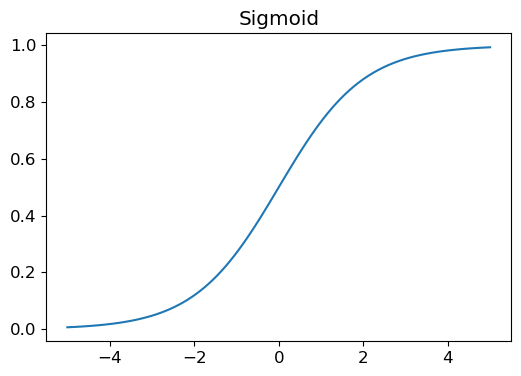

In [136]:
plot_function(torch.sigmoid, title="Sigmoid", min=-5, max=5)

If we use this lovely sigmoid function, we now will have nice positive gradients as everything will be on this curve somewhere and this entire curve is positive in value. We can improve our loss function to include this sigmoid function.

In [137]:
def mnist_loss(predictions,targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

### Mini Batches Make the Gradient Descent Stochastic

Now the reason its called 'stochastic' gradient descent is because we calculate the gradient by only taking a batch from the training dataset, taking the whole dataset before calculating gradients would just make the process gradient descent. Most of the time when you're reading about gradient descent, its probably stochastic by assumption but if you're wondering where that special word comes from, its because you only calculate these values from a sample.

This also ties in nicely to using our GPU's since they can handle many items to do matrix calculation with at the same time, we want to feed our GPU with as much as we can so that we get the benefits of the acceleration they provide

### DataLoaders & Datasets

In order to do this mini batching and sampling, as well as some dataset shuffling during this process, we can use pytorch's (and fastai's) DataLoaders. It can take any python collection and turn it into an iterator with mini-batches.

In [138]:
x = torch.arange(0,100)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
        96, 97, 98, 99])

In [139]:
dl = DataLoader(x,batch_size=10,shuffle=True)
list(dl)

[tensor([30, 98, 68, 87, 21, 94, 78, 81, 38, 60]),
 tensor([59, 83, 18, 16,  3, 40, 84, 57, 28, 20]),
 tensor([77, 63, 42, 15, 29, 56, 75, 62, 49, 26]),
 tensor([ 1, 86, 67, 95, 31, 39, 25, 71, 17, 89]),
 tensor([47, 92,  6, 93, 90, 91, 44,  8, 51,  9]),
 tensor([14, 45, 96, 69, 88, 61, 41, 53, 74, 35]),
 tensor([76, 36, 19, 73, 82, 33, 23, 10, 37, 66]),
 tensor([ 7,  0, 46,  4, 55, 48, 79, 24, 27, 12]),
 tensor([85, 70, 97, 50,  2,  5, 80, 13, 99, 52]),
 tensor([34, 54, 32, 11, 58, 43, 65, 64, 72, 22])]

Lovely and random, happy little shuffled batches. For training our model, remember that we want a collection of independent (x) and dependent(y) variables that correspond with each other being our input data and corresponding label. A collection that has this tuple set is called a Dataset, remember that we prepped our x & y in an earlier section, this follows the same process, lets do the same for the letters of the alphabet

In [140]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [141]:
dl = DataLoader(ds, batch_size=6,shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

Ok lets get back to working through our training loop and use the SGD optimisation with sigmoid etc.

Our pseudo-code for a training loop looks something like:

    for x,y in dataloader:
        predictions = model(x)
        loss = loss_function(predictions, y)
        loss.backward()
        parameters -= parameters.grad * learning_rate

Lets setup our weights/parameters again:

In [142]:
weights = init_params((28*28,1))
bias = init_params(1)

Make our DataLoader object from our Dataset

In [143]:
dl = DataLoader(dataset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [144]:
doc(first)

Cool little helper function to get the first element from something as an example to investigate

Lets also make a dataloader for the validation set

In [145]:
valid_dl = DataLoader(valid_dataset, batch_size=256)

Ok lets get a mini batch manually to test out what we're doing

In [146]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

Lets make some predictions using our matrix multiplication function $prediction = weights@batch + bias$ that we made earlier. Remember that the '@' symbol means matrix multiplication

### Step 2: Calculate Predictions

In [147]:
preds = predict_matrix(batch)
preds

tensor([[-2.1876],
        [-8.3973],
        [ 2.5000],
        [-4.9473]], grad_fn=<AddBackward0>)

### Step 3: Calculate the Loss

Check our loss from our predictions

In [148]:
loss = mnist_loss(preds,train_y[:4])
loss

tensor(0.7419, grad_fn=<MeanBackward0>)

### Step 4: Calculate the Gradients

In [149]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0061), tensor([-0.0420]))

Lets merge all this together into a single function

In [150]:
def calculate_gradients(xb,yb, model):
    preds = model(xb)
    loss = mnist_loss(preds,yb)
    loss.backward()

Check that it works

In [151]:
calculate_gradients(batch,train_y[:4],predict_matrix)
weights.grad.mean(),bias.grad

(tensor(-0.0121), tensor([-0.0840]))

The gradients have changed from the prior values, this is because loss.backward *adds* the gradients of loss to *any* gradients that are currently stored, so we have to set the current gradients to 0 first. Remember that anytime a tensor that has gradients which are tracked is called, it updates those gradients, but we want to do this manually so we have to set these to 0 after each modification so that it doesn't get double changed.

In [152]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

Lets now make a training epoch method, which is the same as we had but adding the parameters being changed and setting the gradients to 0 since we're manually stepping them

### Step 5: Step the Weights

In [153]:
def train_epoch(model, learning_rate, parameters):
    for xb,yb in dl:
        calculate_gradients(xb, yb, model)
        for p in parameters:
            p.data -= p.grad*learning_rate
            p.grad.zero_()

Accuracy is a nice metric to read since our loss metric isn't as understandable as 'correct' or 'incorrect' which our accuracy will, tell us, lets define a batch_accuracy method

In [154]:
def batch_accuracy(xb, yb):
    predictions = xb.sigmoid()
    correct = (predictions>0.5) == yb
    return correct.float().mean()

Lets run a quick test

In [155]:
batch_accuracy(predict_matrix(batch), train_y[:4])

tensor(0.2500)

Ok exceedingly lucky for our batch, lets train an epoch and see how we do

In [156]:
def validate_epoch(model):
    accuracy = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accuracy).mean().item(),4)

Remember that torch.stack concatenates along a given dimension, 0 being the default, item() returns the value of the tensor as a python data object, lets check what round() is since we haven't run into this before

In [157]:
doc(round)

Ok easy, so we're rounding the answer to the precision we specify, being 4. So we're making a list of the accuracies for all the batches with our batch_accuracy method given the model function that we pass in, being predict_matrix or our $prediction = parameters @ x + bias$ matrix calculation on our validation dataloader. We then stack these accuracies into dimension 0, get the mean accuracy and round it to 4 decimals

In [158]:
validate_epoch(predict_matrix)

0.5263

Ok we're slightly above random but its a start

### Step 6: Repeat the Process

In [159]:
learning_rate = 1.
parameters = weights, bias

train_epoch(model=predict_matrix, learning_rate=learning_rate, parameters=parameters)
validate_epoch(predict_matrix)

0.6664

Check that out! We're improving by quite a leap, lets go again for a few rounds:

In [160]:
for i in range(35):
    train_epoch(model=predict_matrix, learning_rate=learning_rate, parameters=parameters)
    print(validate_epoch(predict_matrix), end=" ")

0.8266 0.89 0.9184 0.9277 0.9399 0.9467 0.9506 0.9526 0.956 0.9579 0.9599 0.9609 0.9614 0.9619 0.9633 0.9638 0.9648 0.9658 0.9672 0.9677 0.9667 0.9672 0.9677 0.9672 0.9682 0.9682 0.9692 0.9697 0.9702 0.9707 0.9707 0.9707 0.9707 0.9707 0.9712 

Ok we're up to ~97% accuracy which is about the same as our ~98% accuracy we had with our pixel similarity approach much earlier, lets now create an optimiser in pytorch that will handle this SGD work for us

### Optimisers & Native Pytorch/Fastai Code

For almost everything we've implemented, pytorch is already cooler and faster than us and has build a useful modele or function for us to do the same. This still holds true for our predict_matrix() function and instead use pytorch's nn.Linear module, 'nn' being Neural Net and Linear being linear model since thats all our matrix calculation function is.

nn.Linear will handle our init_params work and matrix_calculation() together, it contains the weights and biases in a single object, lets make it to match our prior work

In [161]:
linear_model = nn.Linear(28*28,1)
linear_model

Linear(in_features=784, out_features=1, bias=True)

In [162]:
doc(nn.Linear)

In [163]:
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

These look identical to our parameters/weights we had before and our bias tensor.

Lets now move our optimisation steps, which was our updating parameters and setting the gradients to 0 within an optimiser class

In [164]:
class BasicOptim:
    def __init__(self, parameters, learning_rate):
        self.parameters = list(parameters)
        self.learning_rate = learning_rate
        
    def step(self, *args, **kwargs):
        for p in self.parameters: p.data -= p.grad.data * self.learning_rate
    
    def zero_grad(self, *args, **kwargs):
        for p in self.parameters: p.grad = None

Lets initialise our optimiser by using the parameters and learning rate

In [165]:
opt = BasicOptim(linear_model.parameters(), learning_rate)

Lets now re-write our train_epoch method to include our optimiser

In [166]:
def train_epoch(model):
    for xb,yb in dl:
        calculate_gradients(xb,yb, model)
        opt.step()
        opt.zero_grad()

In [167]:
validate_epoch(linear_model)

0.5741

Lets run our loop again

In [168]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end="   ")
        
train_model(linear_model, 20)

0.4932   0.812   0.8477   0.9146   0.9351   0.9487   0.9565   0.9624   0.9658   0.9668   0.9687   0.9717   0.9736   0.9746   0.9756   0.9765   0.9775   0.9775   0.9785   0.9785   

Ok looking awesome, again replicating the ~98% accuracy we had earlier, lets now use the fastai class which has everything our BasicOptim class has:

In [169]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), learning_rate)
train_model(linear_model,20)

0.4932   0.9238   0.7266   0.8872   0.9233   0.9404   0.9521   0.9604   0.9658   0.9668   0.9692   0.9707   0.9731   0.9741   0.9756   0.9765   0.977   0.9775   0.978   0.9785   

Fastai also has the concept of a "Learner" which replicated our train_model loop, we have to make a DataLoaders object by passing in our DataLoader validation and train DataLoader objects:

In [170]:
dls = DataLoaders(dl, valid_dl)

We're going to create a generic Learner which means we must specify the optimisation function, the metrics, the loss function etc which we've made within this lesson

In [171]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

We can now call 'fit' which is the training process we've been running

In [172]:
learn.fit(10, lr=learning_rate)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637162,0.503574,0.495584,00:00
1,0.559990,0.141617,0.899902,00:00
2,0.203730,0.208130,0.807164,00:00
3,0.088540,0.114157,0.905790,00:00
4,0.046113,0.081433,0.930815,00:00
5,0.029622,0.064444,0.946025,00:00
6,0.022880,0.054003,0.954858,00:00
7,0.019911,0.047124,0.960746,00:00
8,0.018425,0.042343,0.965162,00:00
9,0.017544,0.038855,0.967125,00:00


Now considering that we did in two lines what has taken us this massive notebook and page to replicate, I think they're pretty amazing libraries, at this point in the book they specifically highlight how there's nothing magic underneath these libraries, simply just really useful packaged up reliable ways to use these techniques. There is also a lot of extra functionality wrapped up.

### Getting Non-Linear

Now if you remember or recall way back, we walked through rectified linear units and we made these little elbows which if we could connect enough we could replicate anything. So far we've only built one linear layer and ran linear calculations on it, lets remake an elbow with two linear units and the max call in between.

In [173]:
def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [174]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

Do note that we're connecting these layers together so the output size of layer 1 has to match the input layer of layer two, in our case this is 30 activations.

Remember how we had two sets of weights and two sets of biases, this gave us our bendy elbow of magic, this is the same thing but with our matrix calculations. This max function is what gives us our non-linearity since two linear layers can just be turned into one.

Lets again re-write our simple net in native pytorch code

In [175]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [176]:
doc(nn.Sequential)

Sequential will call each of our layers in order that we pass it to sequential in our loss and gradient calculation (the forward pass) when we feed it inputs.

Lets pass this back into our fastai Learner and see how we do

In [177]:
learn = Learner(dls=dls,
                model=simple_net,
                opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

learn.fit(40, lr=0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.319768,0.409048,0.504907,00:00
1,0.149339,0.225899,0.812071,00:00
2,0.082113,0.113339,0.917566,00:00
3,0.053668,0.076626,0.940628,00:00
4,0.040543,0.059927,0.957802,00:00
5,0.033867,0.050591,0.963690,00:00
6,0.030043,0.044729,0.965162,00:00
7,0.027567,0.040722,0.967125,00:00
8,0.025792,0.037805,0.969087,00:00
9,0.024421,0.035580,0.970559,00:00


Again we're back up to our ~98% accuracy.

also our learner records our progress in the learn.recorder attribute, which we can plot:

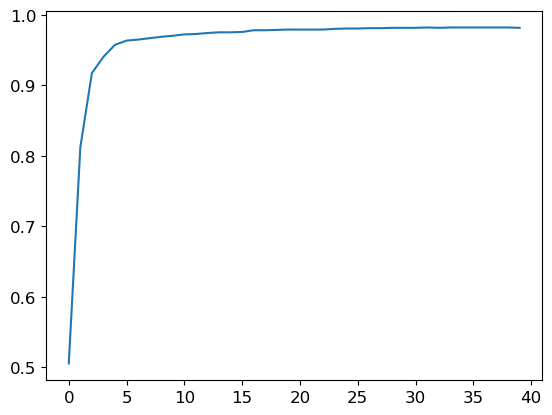

In [178]:
plt.plot(L(learn.recorder.values).itemgot(2))

### Back to the Owl

The book mentions two important points:
 - We can make a function to solve any problem to any level of accuracy given the right parameters
 - We can find the right parameters automatically for any function with SGD
 
We've also constructed manually each of the pieces sitting in pytorch so we know its not that much hidden trickery. Now do note that we've only been predicting sevens and threes to a 98% accuracy, we only use two layers that are quite small, however we can make something as deep as we like with any sizes and shapes in the hidden layers. We can also now attempt to predict all the classes from MNIST, not just the threes and sevens, The wonderful thing about adding depth into the network is that (from the book)

*"we do not need to use as many parameters, it turns out that we can use smaller matrices with more layers, and get better results than we would with larger matrices, and few layers"*

Just because the universal approximation theory says we only need two layers, doesn't mean that its practical, apparently this held back deep learning for years, and apparently there's theoretical results that show why this depth is powerful and why it works.

Lets use the shark model learner that we created last lesson to smash MNIST in one fit cycle. We wrote this whole dang chapter and it all gets demolished in one sneaky learner boi, how cruel.

In [179]:
dls = ImageDataLoaders.from_folder(mnist_path / "mnist_sample")

learn = vision_learner(dls=dls,
                       arch=resnet18,
                       pretrained=False,
                       loss_func=F.cross_entropy,
                       metrics=accuracy)

learn.fit_one_cycle(n_epoch=1,
                    lr_max=0.1)

C:\Users\Nick\Anaconda3\envs\fastai\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Nick\Anaconda3\envs\fastai\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.132367,0.019363,0.996565,00:51


And we achieved ~99.6% accuracy with pretty much one line of code, kind of insane! I wonder how our little 2 layer model would compare to the resnet beast we just ran

In [180]:
doc(learn.fit_one_cycle)

[Sylvain Gugger has an awesome write up on what on earth the 1cycle policy is](https://sgugger.github.io/the-1cycle-policy.html) as this is a different way of fitting a model than the usual fit cycle that we built within this blog, highly recommend reading that as I'll butcher saying the same thing. It seems to involve cyling the learning rates to prevent getting stuck and allow the model to make large leaps to find the flattest minimum overall. [Leslie N Smith seems to be the original author of the paper with many thousands of citations](https://scholar.google.com/citations?view_op=view_citation&hl=en&user=pwh7Pw4AAAAJ&citation_for_view=pwh7Pw4AAAAJ:hqOjcs7Dif8C)

Sylvain is also a co-author of the fastai book that I'm referencing here and is one of the fastai gods, go read his stuff, its awesome!

### Thats All Folks

Did you actually make it this far with me? Is there another human who's ventured this deep into this page? I don't believe you, regardless, thanks for coming along with my work on chapter 3, it was a pretty big mission to work through and I'm sure I'll have to return in the future for reference but I learnt an awesome amount here